In [1]:
from datasets import load_dataset, load_metric

raw_datasets = load_dataset("wmt17", "zh-en", cache_dir="/data2/hanyings/.cache")
metric = load_metric("sacrebleu")

/data2/hanyings/conda_envs/tnmt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset wmt17 (/data2/hanyings/.cache/wmt17/zh-en/1.0.0/2d49e0ac9500439706ca425bb2059f0db0d024ab28ca19b0b64fc0030a714953)
100%|██████████| 3/3 [00:36<00:00, 12.11s/it]
/tmp/ipykernel_3385/2303173043.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("sacrebleu")


In [2]:
from transformers import AutoModelWithLMHead,AutoTokenizer,pipeline, MarianTokenizer, MarianTokenizer, TFMarianMTModel, AutoModelForSeq2SeqLM
import torch
mode_name = '/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model =AutoModelForSeq2SeqLM.from_pretrained(mode_name)
tokenizer = AutoTokenizer.from_pretrained(mode_name, return_tensors="pt")

2022-12-12 18:44:07.488185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 18:44:12.927504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.2/lib64:$LD_LIBRARY_PATH
2022-12-12 18:44:12.927881: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.2/lib64:$LD_LIBRARY_PATH
2022-12-12 18:44:12.927890: W tensorflow/c

In [3]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 25134743
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2002
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2001
    })
})

In [4]:
split = raw_datasets["train"].train_test_split(test_size=1)
raw_datasets["train"] = split["test"]
raw_datasets["validation"] = split["test"]
raw_datasets["test"] = split["test"]
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 1
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1
    })
})

In [5]:
# prefix = ""
# max_input_length = 128
# max_target_length = 128
# source_lang = "en"
# target_lang = "zh"
# def preprocess_function(examples):
#     inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
#     targets = [ex[target_lang] for ex in examples["translation"]]
#     model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)
#     # Setup the tokenizer for targets
#     with tokenizer.as_target_tokenizer():
#         labels = tokenizer(targets, max_length=max_target_length, truncation=True)
#     model_inputs["labels"] = labels["input_ids"]
#     return model_inputs

In [6]:
preprocess = preprocess_function(raw_datasets['train'][:1])
preprocess

NameError: name 'preprocess_function' is not defined

In [ ]:
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)
tokenized_datasets

100%|██████████| 1/1 [00:00<00:00, 171.79ba/s]
Loading cached processed dataset at /data2/hanyings/.cache/wmt17/zh-en/1.0.0/2d49e0ac9500439706ca425bb2059f0db0d024ab28ca19b0b64fc0030a714953/cache-7ffeacd63e3c9838.arrow
Loading cached processed dataset at /data2/hanyings/.cache/wmt17/zh-en/1.0.0/2d49e0ac9500439706ca425bb2059f0db0d024ab28ca19b0b64fc0030a714953/cache-7ffeacd63e3c9838.arrow


DatasetDict({
    train: Dataset({
        features: ['translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1
    })
    validation: Dataset({
        features: ['translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1
    })
    test: Dataset({
        features: ['translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1
    })
})

In [ ]:
tokenized_datasets["train"][0]

{'translation': {'en': '(c) Encourage and support participatory research with street-connected children and families to inform policy-making and design of specialized interventions.',
  'zh': '鼓励和支助围绕与街头有联系的儿童及其家人开展参与型研究，为制定政策和设计专门干预措施提供信息。'},
 'input_ids': [22,
  149,
  17,
  20327,
  7,
  125,
  10252,
  1304,
  29,
  8979,
  16,
  56308,
  238,
  7,
  2106,
  9,
  3842,
  419,
  16,
  2516,
  7,
  3634,
  4,
  2372,
  6529,
  6,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'labels': [5078,
  12103,
  13169,
  67,
  21047,
  25153,
  568,
  28152,
  589,
  467,
  3517,
  751,
  2,
  76,
  25892,
  18,
  3808,
  2728,
  15031,
  12224,
  10,
  0]}

In [ ]:
token = tokenized_datasets["train"][0]["input_ids"][1]
token

149

In [ ]:

old_embed = model.get_encoder().embed_tokens(torch.tensor(tokenized_datasets["train"][0]["input_ids"]))
old_embed

tensor([[ 0.0029,  0.0093, -0.0038,  ..., -0.0296, -0.0405, -0.0319],
        [ 0.0101,  0.0050,  0.0023,  ..., -0.0351, -0.0636, -0.0068],
        [ 0.0057,  0.0075,  0.0078,  ..., -0.0462, -0.0066, -0.0438],
        ...,
        [ 0.0026,  0.0119, -0.0073,  ..., -0.0304, -0.0043, -0.0533],
        [-0.0153,  0.0381, -0.0026,  ..., -0.0481, -0.0228, -0.0146],
        [ 0.0114,  0.0352, -0.0117,  ..., -0.0167, -0.0142, -0.0327]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
old_embed.size()

torch.Size([27, 512])

Retrain model

In [7]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
import os
os.environ["WANDB_DISABLED"] = "true"
args = Seq2SeqTrainingArguments(
    "./tmp_trainer",
    evaluation_strategy = "epoch", # evaluate on valid dataset at emd pf each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    metric_for_best_model = "bleu",  #Must be the name of a metric returned by the evaluation with or without the prefix "eval_".
    # bleu in the compute metric ?   
    save_strategy="no"
    
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

import numpy as np
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, tokenize="zh",smooth_method="add-k")
    result = {"bleu": result["score"]}
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["train"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


NameError: name 'tokenized_datasets' is not defined

In [ ]:
model.to("cpu")
new_embed = model.get_encoder().embed_tokens(torch.tensor([token]))
new_embed

tensor([[ 1.0144e-02,  5.0447e-03,  2.2518e-03, -1.7374e-02,  2.7206e-02,
          1.6035e-02, -1.3437e-02, -1.8341e-02,  3.6228e-02, -2.5258e-02,
         -1.5547e-02, -8.9262e-04, -2.0592e-02,  1.1161e-02,  7.9412e-03,
         -4.9970e-03, -2.5273e-02, -1.9579e-02, -3.4272e-02, -1.3408e-02,
         -2.3376e-03, -2.8470e-02, -1.8016e-02,  5.9842e-04,  2.8821e-03,
          2.2967e-03, -1.5486e-02,  1.0980e-01,  7.5325e-03,  3.2127e-03,
         -8.1589e-02, -1.0854e-02, -1.1434e-02,  1.8830e-02, -6.8241e-03,
          6.0114e-03, -3.5065e-02, -7.3030e-02,  2.9641e-02, -1.3873e-02,
          2.6968e-02, -3.1924e-02, -2.0414e-05, -2.8745e-02, -1.6473e-02,
         -1.7155e-02,  1.2791e-02,  3.6385e-02, -4.6023e-02, -7.3509e-02,
          3.4076e-02, -2.7510e-02, -7.1822e-02,  5.6939e-03,  1.2389e-02,
         -1.3336e-02, -1.4755e-02,  1.6470e-02, -2.7795e-02, -3.4384e-02,
         -3.8219e-02, -2.6174e-02, -3.0673e-02, -1.9236e-02, -2.7159e-03,
          2.3940e-03,  1.1802e-01, -2.

In [ ]:
from scipy.spatial.distance import cosine
1 - cosine(old_embed[0].detach().numpy(), new_embed[0].detach().numpy())

0.9999964237213135

In [ ]:
from datasets.arrow_dataset import Dataset
Dataset.from_dict(preprocess)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1
})

Functions wrapup

In [37]:
from transformers import AutoModelWithLMHead,AutoTokenizer,pipeline, MarianTokenizer, MarianTokenizer, TFMarianMTModel, AutoModelForSeq2SeqLM
import torch
mode_name = '/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model =AutoModelForSeq2SeqLM.from_pretrained(mode_name)
tokenizer = AutoTokenizer.from_pretrained(mode_name, return_tensors="pt")
from datasets import load_dataset, load_metric
raw_datasets = load_dataset("wmt17", "zh-en", cache_dir="/data2/hanyings/.cache")
metric = load_metric("sacrebleu")

from datasets.arrow_dataset import Dataset
prefix = ""
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "zh"
def preprocess_function(examples):
    inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)
    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    model_inputs["translation"] = examples["translation"]
    return model_inputs

loading configuration file /data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000/config.json
Model config MarianConfig {
  "_name_or_path": "/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      65000
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 65000,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 0,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token

In [38]:
from datasets import load_dataset, load_metric
def preprocess_dataset(num_ex):
    raw_datasets = load_dataset("wmt17", "zh-en", cache_dir="/data2/hanyings/.cache")   
    preprocess = preprocess_function(raw_datasets['train'][num_ex:num_ex+1])
    return Dataset.from_dict(preprocess)
    

In [39]:
dataset = preprocess_dataset(7)
dataset

Found cached dataset wmt17 (/data2/hanyings/.cache/wmt17/zh-en/1.0.0/2d49e0ac9500439706ca425bb2059f0db0d024ab28ca19b0b64fc0030a714953)
100%|██████████| 3/3 [00:00<00:00, 78.21it/s]


Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'translation'],
    num_rows: 1
})

In [40]:
dataset[0]

{'input_ids': [2666,
  1306,
  2,
  3,
  5031,
  4,
  3,
  2793,
  4,
  6035,
  1116,
  2229,
  49763,
  66,
  2535,
  9,
  146,
  29,
  3,
  5031,
  4,
  3,
  23396,
  17878,
  6,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'labels': [3952,
  2,
  2905,
  3649,
  7370,
  11801,
  3921,
  16562,
  18,
  18332,
  11360,
  12,
  3921,
  34390,
  5145,
  1720,
  10,
  0],
 'translation': {'en': 'Of course, the fall of the house of Lehman Brothers has nothing to do with the fall of the Berlin Wall.',
  'zh': '当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。'}}

In [41]:
from transformers import AutoModelWithLMHead,AutoTokenizer,pipeline, MarianTokenizer, MarianTokenizer, TFMarianMTModel, AutoModelForSeq2SeqLM
import torch
def get_old_embed(dataset):
    mode_name = '/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000'
    model =AutoModelForSeq2SeqLM.from_pretrained(mode_name)
    return model.get_encoder().embed_tokens(torch.tensor(dataset[0]["input_ids"]))

In [42]:
old_embed = get_old_embed(dataset)
old_embed.size()

loading configuration file /data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000/config.json
Model config MarianConfig {
  "_name_or_path": "/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      65000
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 65000,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 0,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token

torch.Size([26, 512])

In [43]:
old_embed

tensor([[ 0.0153, -0.0038,  0.0085,  ..., -0.0577, -0.0065, -0.0415],
        [-0.0123, -0.0079, -0.0223,  ..., -0.0177, -0.0312, -0.0419],
        [ 0.0114,  0.0256,  0.0116,  ..., -0.0563, -0.0548, -0.0277],
        ...,
        [ 0.0466, -0.0057,  0.0314,  ..., -0.0157, -0.0185, -0.0190],
        [-0.0154,  0.0380, -0.0025,  ..., -0.0482, -0.0226, -0.0147],
        [ 0.0114,  0.0351, -0.0119,  ..., -0.0167, -0.0144, -0.0326]],
       grad_fn=<EmbeddingBackward0>)

In [44]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
import os
def retrain(dataset):
    mode_name = '/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000'
    model =AutoModelForSeq2SeqLM.from_pretrained(mode_name)
    tokenizer = AutoTokenizer.from_pretrained(mode_name, return_tensors="pt")
    
    os.environ["WANDB_DISABLED"] = "true"
    args = Seq2SeqTrainingArguments(
        "./tmp_trainer",
        evaluation_strategy = "epoch", # evaluate on valid dataset at emd pf each epoch
        learning_rate=2e-5,
        per_device_train_batch_size=1,
        per_device_eval_batch_size=1,
        weight_decay=0.01,
        save_total_limit=3,
        num_train_epochs=10,
        predict_with_generate=True,
        metric_for_best_model = "bleu",  #Must be the name of a metric returned by the evaluation with or without the prefix "eval_".
        # bleu in the compute metric ?   
        save_strategy="no"
    )

    data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

    import numpy as np
    def postprocess_text(preds, labels):
        preds = [pred.strip() for pred in preds]
        labels = [[label.strip()] for label in labels]
        return preds, labels
    def compute_metrics(eval_preds):
        preds, labels = eval_preds
        if isinstance(preds, tuple):
            preds = preds[0]
        decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
        # Replace -100 in the labels as we can't decode them.
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        # Some simple post-processing
        decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
        result = metric.compute(predictions=decoded_preds, references=decoded_labels, tokenize="zh",smooth_method="add-k")
        result = {"bleu": result["score"]}
        prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
        result["gen_len"] = np.mean(prediction_lens)
        result = {k: round(v, 4) for k, v in result.items()}
        return result

    trainer = Seq2SeqTrainer(
        model,
        args,
        train_dataset=dataset,
        eval_dataset=dataset,
        data_collator=data_collator,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()
    return model, tokenizer

In [45]:
model, tokenizer = retrain(dataset)

loading configuration file /data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000/config.json
Model config MarianConfig {
  "_name_or_path": "/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      65000
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 65000,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 0,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token

Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,No log,0.353989,51.321600,18.000000
2,No log,0.227323,67.208600,18.000000
3,No log,0.150327,89.820700,18.000000
4,No log,0.103348,100.000000,18.000000
5,No log,0.071431,100.000000,18.000000
6,No log,0.052304,100.000000,18.000000
7,No log,0.040667,100.000000,18.000000
8,No log,0.033638,100.000000,18.000000
9,No log,0.029591,100.000000,18.000000
10,No log,0.027723,100.000000,18.000000


The following columns in the evaluation set  don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: translation.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 1
The following columns in the evaluation set  don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: translation.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 1
The following columns in the evaluation set  don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: translation.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 1
The following columns in the evaluation set  don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: translation.
***** Running Evaluation *****
  Num examples = 1
  Batch size = 1
The following columns in the evaluation set  don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: translation.
***** Runnin

In [46]:
def get_new_embed(model, dataset):
    model.to("cpu")
    return model.get_encoder().embed_tokens(torch.tensor(dataset[0]["input_ids"]))


In [47]:
new_embed = get_new_embed(model, dataset)
new_embed

tensor([[ 0.0153, -0.0037,  0.0086,  ..., -0.0578, -0.0064, -0.0415],
        [-0.0124, -0.0079, -0.0223,  ..., -0.0178, -0.0311, -0.0419],
        [ 0.0115,  0.0256,  0.0115,  ..., -0.0563, -0.0549, -0.0276],
        ...,
        [ 0.0467, -0.0057,  0.0314,  ..., -0.0156, -0.0185, -0.0190],
        [-0.0153,  0.0381, -0.0025,  ..., -0.0482, -0.0226, -0.0147],
        [ 0.0113,  0.0350, -0.0119,  ..., -0.0167, -0.0144, -0.0325]],
       grad_fn=<EmbeddingBackward0>)

In [48]:
from scipy.spatial.distance import cosine

def cosine_sim(dataset, old_embed, new_embed):
    output = dataset[0]
    output["cosine_sim"] = []
    for i in range(len(old_embed)):
        cos = 1 - cosine(old_embed[i].detach().numpy(), new_embed[i].detach().numpy())
        output["cosine_sim"].append(cos)
    return output

In [49]:
cosine_data = cosine_sim(dataset, old_embed, new_embed)
cosine_data

{'input_ids': [2666,
  1306,
  2,
  3,
  5031,
  4,
  3,
  2793,
  4,
  6035,
  1116,
  2229,
  49763,
  66,
  2535,
  9,
  146,
  29,
  3,
  5031,
  4,
  3,
  23396,
  17878,
  6,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'labels': [3952,
  2,
  2905,
  3649,
  7370,
  11801,
  3921,
  16562,
  18,
  18332,
  11360,
  12,
  3921,
  34390,
  5145,
  1720,
  10,
  0],
 'translation': {'en': 'Of course, the fall of the house of Lehman Brothers has nothing to do with the fall of the Berlin Wall.',
  'zh': '当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。'},
 'cosine_sim': [0.9999985694885254,
  0.9999991059303284,
  0.9999980926513672,
  0.9999982714653015,
  0.9999990463256836,
  0.9999983310699463,
  0.9999982714653015,
  0.9999990463256836,
  0.9999983310699463,
  0.9999989867210388,
  0.9999985098838806,
  0.9999988675117493,
  0.9999985098838806,
  0.9999980926513672,
  0.9999982714653015,
  0

In [50]:
tokenizer.convert_ids_to_tokens(51091)

'▁1929'

In [51]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import string 

def top_k_token(dataset_cos, tokenizer, k=3):
    idx = np.argsort(dataset_cos["cosine_sim"])[:k]
    input_tokens = [dataset_cos['input_ids'][i] for i in idx ]
    return [tokenizer.decode(t) for t in input_tokens if tokenizer.decode(t) not in string.punctuation]

In [52]:
top_k_token(cosine_data, tokenizer)

['to', 'has']

In [53]:
import nltk
from nltk.corpus import stopwords
import string 
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
punc = string.punctuation
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users/as/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
tokenizer.convert_tokens_to_ids(['▁been', ','])

[74, 2]

In [55]:
tokenizer.convert_ids_to_tokens(74)

'▁been'

In [56]:
tokenizer.convert_tokens_to_string('▁nothing')

'▁nothing'

In [57]:
tokenizer.decode(3)

'the'

In [58]:
import re
from nltk.corpus import stopwords
import string 
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
def is_stopword(token_id, tokenizer):
    word = tokenizer.decode(token_id)
    if word in string.punctuation:
        return True
    word = word.lower()
    word = re.sub(r'[^\w\s]', '', word)
    stopword = stopwords.words('english') + ["</s>", "<unk>", ">>cmn_Hans<<", "<pad>"]
    if word in stopword or not word:
        return True
    return False  
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users/as/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
is_stopword(243, tokenizer)

True

In [60]:
import random
def wrap(num_ex, k=3):
    output = []
    for i in range(num_ex):
        id = random.randint(0, 2000)
        dataset = preprocess_dataset(i)
        old_embed = get_old_embed(dataset)
        model, tokenizer = retrain(dataset)
        new_embed = get_new_embed(model, dataset)
        cosine_data = cosine_sim(dataset, old_embed, new_embed)
        output.append({"translation": cosine_data["translation"], "top_tokens": top_k_token(cosine_data, tokenizer, k=k)})
    return output
        

In [66]:
from scipy.spatial.distance import cosine
def cosine_sim_nostop(dataset, old_embed, new_embed, tokenizer):
    output = dataset[0]
    output["cosine_sim"] = []
    for i in range(len(old_embed)):
        current_token = output["input_ids"][i]
        if is_stopword(current_token, tokenizer):
            output["cosine_sim"].append(100)
            continue
        cos = 1 - cosine(old_embed[i].detach().numpy(), new_embed[i].detach().numpy())
        output["cosine_sim"].append(cos)
    return output

In [62]:
cosine_data = cosine_sim_nostop(dataset, old_embed, new_embed, tokenizer)
cosine_data

{'input_ids': [2666,
  1306,
  2,
  3,
  5031,
  4,
  3,
  2793,
  4,
  6035,
  1116,
  2229,
  49763,
  66,
  2535,
  9,
  146,
  29,
  3,
  5031,
  4,
  3,
  23396,
  17878,
  6,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'labels': [3952,
  2,
  2905,
  3649,
  7370,
  11801,
  3921,
  16562,
  18,
  18332,
  11360,
  12,
  3921,
  34390,
  5145,
  1720,
  10,
  0],
 'translation': {'en': 'Of course, the fall of the house of Lehman Brothers has nothing to do with the fall of the Berlin Wall.',
  'zh': '当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。'},
 'cosine_sim': [100,
  0.9999991059303284,
  100,
  100,
  0.9999990463256836,
  100,
  100,
  0.9999990463256836,
  100,
  0.9999989867210388,
  0.9999985098838806,
  0.9999988675117493,
  0.9999985098838806,
  100,
  0.9999982714653015,
  100,
  100,
  100,
  100,
  0.9999990463256836,
  100,
  100,
  0.9999987483024597,
  0.9999991655349731,


In [63]:
top_k_token(cosine_data, tokenizer, k=2)

['nothing', 'Brothers']

In [67]:
import random 
def wrap_nostop(num_ex, k=3):
    output = []
    for i in range(num_ex):
        id = random.randint(0, 2000)
        dataset = preprocess_dataset(id)
        old_embed = get_old_embed(dataset)
        model, tokenizer = retrain(dataset)
        new_embed = get_new_embed(model, dataset)
        cosine_data = cosine_sim_nostop(dataset, old_embed, new_embed, tokenizer)
        
        output.append({"translation": cosine_data["translation"], "top_tokens": top_k_token(cosine_data, tokenizer, k=k)})
    return output

In [68]:
%%capture
result = wrap_nostop(100, k=5)

loading configuration file /data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000/config.json
Model config MarianConfig {
  "_name_or_path": "/data2/hanyings/opus-mt-en-zh-finetuned-en-to-zh-1109/checkpoint-208000",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      65000
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 65000,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 0,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token

In [69]:
result

[{'translation': {'en': 'Moreover, the CAP’s role as a motor of political and social integration in Europe could be restored once renewed policies are in place.',
   'zh': '而且只要更新后的政策就位，共同农业政策在欧洲政治与社会整合过程中所扮演的发动机角色就能恢复。'},
  'top_tokens': ['Moreover', 'motor', 'renewed', 'place', 'social']},
 {'translation': {'en': 'In the end, the Addis Ababa Action Agenda provides that the current Committee of Experts will continue to function according to its 2004 mandate, with three additional meeting days per year, all funded through voluntary contributions.',
   'zh': '最终，亚的斯亚贝巴行动日程（Addis Ababa Action Agenda）规定，目前的专家委员会将继续根据其2004年的权限行使功能，每年增加三次会议，完全以自愿捐款的方式筹集资金。'},
  'top_tokens': ['function', 'three', '2004', 'continue', 'funded']},
 {'translation': {'en': 'Now, with household debt sustained on a knife-edge after feverish government intervention, the fiscal position has deteriorated dramatically and the current-account balance has worsened again.',
   'zh': '如今政府大力干预后的家庭负债状况依然处于危险边缘，同时财政状况急剧恶化，经

In [ ]:
result[1]["top_tokens"]

['happening', 'widen', 'analog', 'deepen', 'understand']

In [78]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')
#pos = nltk.pos_tag(result[0]["top_tokens"])
def count_pos(result_dict):
    all_tokens = []
    for sent in result_dict:
        all_tokens += sent["top_tokens"]
    pos = nltk.pos_tag(all_tokens)
    the_count = Counter(tag for _, tag in pos)
    
    labels, values = zip(*the_count.items())

    indexes = np.arange(len(labels))
    width = 1

    plt.title("Distribution of Tokens POS")
    plt.bar(indexes, values, width, color=(0.3, 0.4, 0.7, 0.6))
    plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.show()
    return the_count

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/users/as/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


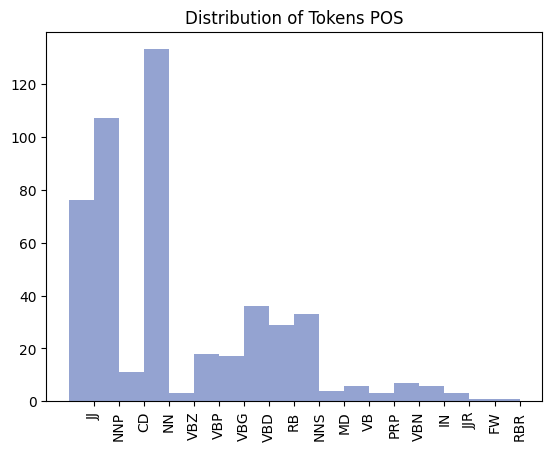

In [79]:
count = count_pos(result)

In [72]:
count

Counter({'RB': 50,
         'NN': 122,
         'VBD': 2,
         'JJ': 79,
         'CD': 6,
         'VBN': 3,
         'VBP': 15,
         'NNP': 59,
         'NNS': 30,
         'VBZ': 13,
         'IN': 1,
         'VBG': 28,
         'MD': 23,
         'VB': 23,
         'JJR': 1,
         'DT': 12,
         'FW': 33})

In [ ]:
from transformers import pipeline
import os
os.environ['TRANSFORMERS_CACHE'] = '/data2/hanyings/.cache'
unmasker = pipeline('fill-mask', model='bert-base-uncased')
#words = unmasker("Hello I'm a [MASK] boy.")
from nltk.corpus import wordnet as wn
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "zh"
def find_tokenidx(token, sentence_lst):
  for i in range(len(sentence_lst)):
    if token in sentence_lst[i]:
      return i
def mutant_pairs(examples):
  pairs=[]
  inputs = [ex["translation"][source_lang] for ex in examples]
  for i, input in enumerate(inputs):
    input_list = input.split()
    tokens = examples[i]['top_tokens']
    # sys = wn.synsets(input_list[tokens])
    # idx = 0
    # while 1:
    #   if len(wn.synset(sys[idx].name()).lemmas()) >= 2:
    #     break
    #   idx += 1
    # candidate = [str(lemma.name()) for lemma in wn.synset(sys[idx].name()).lemmas()]
    print(tokens)
    token_idx = find_tokenidx(tokens[0], input_list)
    print(input_list[token_idx])
    input_list[token_idx] = "[MASK]"
    candidate = unmasker(" ".join(input_list))
    #print(candidate)
    mutants = []
    for c in candidate[:3]:
      mutant = input_list.copy()
      mutant[token_idx] = c["token_str"]
      mutants.append(" ".join(mutant))
    pairs.append({'en': input, 'mutants': mutants})
  return pairs

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /home/users/as/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.14.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading configuration file https://huggingface.co/bert-

In [ ]:
mutant_pairs(result)

['1929', '1989', 'or', '</s>']
1929
['happening', 'widen', 'analog', 'deepen', 'understand']
happening.
['classical', 'reassuring', 'refer', 'cyclical', 'many']
classical
['grim', 'mood', 'classical', 'behave', 'governments']
grimmer,
['diffusion', 'tendency', 'restraint', 'States', 'Europe']
diffusion
['moved', 'badly', 'avoiding', 'implement', 'fronts']
moved
['geo', 'naturally', 'comes', 'year', 'economic']
geo-strategists,
['nothing', 'Brothers', 'h', 'Berlin', 'man']
nothing
['reassuring', 'destruct', 'oppression', 'versus', 'perfect']
reassuring
['unfolding', 'correspond', '2008-2009,', 'felt', 'whose']
unfolding
['end', 'end', 'ideological', 'divide', 'absolute']
end
['jeopardize', '2009', '1989,', 'tendencies', 'principles']
jeopardize
['Blo', 'promoted', 'c', 'ideology', 'triumph']
Bloc.
['deliberate', 'brink', 'Ronald', 'pushed', 'supporters']
deliberate
['differences', 'obvious', '1989', 'course', 'Of']
differences
['collapse', 'bi', 'First', 'arity', '1989']
collapse
['subs

[{'en': '1929 or 1989?',
  'mutants': ['1988 or 1989?', '1989 or 1989?', '1987 or 1989?']},
 {'en': 'PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been happening.',
  'mutants': ['PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been .',
   'PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been ;',
   'PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been ?']},
 {'en': 'At the start of the crisis, many people likened it to 1982 or 1973, which was reassuring, because both dates refer to classical cyclical downturns.',
  'mutants': ['At the start of the crisis, many people likened it to 1982 or 1973, which was reassuring, because both dates re

In [ ]:
from nltk.corpus import wordnet as wn

sys = wn.synsets("book", pos = wn.VERB)

#[str(lemma.name()) for lemma in wn.synset(sys[0].name()).lemmas()]
sys


[Synset('book.v.01'),
 Synset('reserve.v.04'),
 Synset('book.v.03'),
 Synset('book.v.04')]

In [ ]:
wn.synsets('however', wn.ADV)[0].lemma_names()

['however',
 'nevertheless',
 'withal',
 'still',
 'yet',
 'all_the_same',
 'even_so',
 'nonetheless',
 'notwithstanding']

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet as wn

def tag(sentence):
 words = word_tokenize(sentence)
 words = pos_tag(words)
 return words

def paraphraseable(tag):
 return tag.startswith('N') or tag.startswith('V') or tag.startswith('J') or tag.startswith('R')

def pos(tag):
 if tag.startswith('N'):
  return wn.NOUN
 elif tag.startswith('V'):
  return wn.VERB
 elif tag.startswith('J'):
  return wn.ADJ
 elif pos.startswith("R"):
        return wn.ADV

def synonyms(word, tag):
    lemma_lists = [ss.lemmas() for ss in wn.synsets(word, pos(tag))]
    lemmas = [lemma.name() for lemma in sum(lemma_lists, [])]
    return set(lemmas)

def synonymIfExists(sentence, index):
   tags = tag(sentence)
   word, t = tags[index]
   if paraphraseable(t):
    syns = synonyms(word, t)
    if syns:
      syns_list = [s for s in syns if s.lower() != word.lower()]
      return word, syns_list
    return word, []

def paraphrase(sentence):
 return [x for x in synonymIfExists(sentence)]
get=[]
get=synonymIfExists("I am his old brother", 4)
print("paraphrase",get)

paraphrase ('brother', ['buddy', 'blood_brother', 'chum', 'sidekick', 'pal', 'comrade', 'crony'])


In [ ]:
input = tokenizer(["I am his old blood brother"], return_tensors="pt")
outputs = model.generate(input.input_ids, output_scores=True, return_dict_in_generate=True, output_hidden_states=True)
tokenizer.batch_decode(outputs['sequences'], skip_special_tokens=True)

['我是他的老兄弟']

In [ ]:
outputs

BeamSearchEncoderDecoderOutput(sequences=tensor([[65000,  2672,  2320,  2554,  7370,     0]]), sequences_scores=tensor([-0.6191]), scores=(tensor([[-8.0706e+00, -1.3176e+01, -1.8279e+01,  ..., -2.0530e+01,
         -2.0005e+01,        -inf],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
         -1.0000e+09,        -inf],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
         -1.0000e+09,        -inf],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
         -1.0000e+09,        -inf]]), tensor([[ -9.0575,  -9.1186,  -9.8088,  ..., -19.7308, -25.6526,     -inf],
        [-12.3644, -10.8325,  -6.5922,  ..., -20.7825, -25.4118,     -inf],
        [-12.9211, -14.8706, -18.3882,  ..., -26.8826, -28.8784,     -inf],
        [-10.2162,  -7.9428,  -7.1700,  ..., -21.1276, -23.4055,     -inf]]), tensor([[ -9.6594, -10.5615, -10.2936,  ..., -21.6635, -25.1355,     -inf],
        [ -9.1250,  -9.4463,  -8.5660,  ..., -21.3557, -23.9969, 

In [ ]:
from text2vec import SentenceModel
sentences = ['我是他的老兄弟', '我不是他的老弟']

model2 = SentenceModel('shibing624/text2vec-base-chinese')
embeddings = model.encode(sentences)
print(embeddings)

2022-12-11 14:01:50.942 | DEBUG    | text2vec.sentence_model:__init__:74 - Use device: cuda


[[ 0.7635359  -0.39156067  0.63999367 ...  0.2583298  -0.5223585
  -0.21127473]
 [ 1.2544321  -0.17131853  1.1561146  ...  0.10490549 -0.32768762
  -0.14699247]]


In [ ]:
from scipy.spatial.distance import cosine
cos = 1 - cosine(embeddings[0], embeddings[1])
cos

0.8003824949264526

In [ ]:
token_embeds

tensor([[[ 0.0153, -0.0026,  0.0152,  ..., -0.0576, -0.0526, -0.0256],
         [ 0.0462,  0.0016, -0.0089,  ..., -0.0551, -0.0275, -0.0398],
         [ 0.0034,  0.0044, -0.0047,  ..., -0.0065, -0.0797, -0.0053],
         [-0.0086,  0.0047,  0.0133,  ..., -0.0568,  0.0043, -0.0624],
         [-0.0349,  0.0133,  0.0089,  ...,  0.0094, -0.0346, -0.0145],
         [ 0.0114,  0.0351, -0.0119,  ..., -0.0167, -0.0144, -0.0326]]],
       grad_fn=<IndexBackward0>)

In [ ]:
input=tokenizer('I like dog.',return_tensors="pt").input_ids
outputs = model.generate(input, output_scores=True, return_dict_in_generate=True, output_hidden_states=True)
tokenizer.batch_decode(outputs['sequences'], skip_special_tokens=True)

['我喜欢狗。']

In [ ]:
# get your batch data: token_id, mask and labels
token_ids = tokenizer('Meanwhile, over the past week, Syrian government troops, backed by Russia and Iran, have retaken almost all of Aleppo – once Syria’s largest city, now utterly devastated by the war.', return_tensors="pt").input_ids

with tokenizer.as_target_tokenizer():
    labels = tokenizer('此外，过去一周，叙利亚政府军在俄罗斯和伊朗的支持下，已经夺回了几乎整个阿勒颇——阿勒颇曾是叙利亚最大的城市，现在已经彻底毁灭在战火之中。', return_tensors="pt").input_ids
# get your token embeddings
token_embeds=model.get_input_embeddings().weight[token_ids].clone()
token_embeds.retain_grad() 
# get model output that contains loss value
outs = model(inputs_embeds=token_embeds,labels=labels, output_hidden_states=True, output_attentions=True)
loss=outs.loss
loss

tensor(10.0308, grad_fn=<NllLossBackward0>)

In [ ]:
loss.backward(retain_graph=True)
grad=token_embeds.grad
grad.size()

torch.Size([1, 42, 512])

In [ ]:
import torch
import numpy as np
idx = np.argsort(torch.norm(grad, dim=2).squeeze(dim=0)).tolist()[::-1][:15]

In [ ]:
import string
input_tokens = [token_ids[0][i] for i in idx ]
[tokenizer.decode(t) for t in input_tokens]

['over',
 ',',
 'the',
 'Meanwhile',
 'past',
 'week',
 'Syrian',
 ',',
 'Iran',
 'government',
 'troops',
 'have',
 ',',
 'and',
 'backed']

In [ ]:
raw_datasets['train'][:10]

{'translation': [{'en': '1929 or 1989?', 'zh': '1929年还是1989年?'},
  {'en': 'PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been happening.',
   'zh': '巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。'},
  {'en': 'At the start of the crisis, many people likened it to 1982 or 1973, which was reassuring, because both dates refer to classical cyclical downturns.',
   'zh': '一开始，很多人把这次危机比作1982年或1973年所发生的情况，这样得类比是令人宽心的，因为这两段时期意味着典型的周期性衰退。'},
  {'en': 'Today, the mood is much grimmer, with references to 1929 and 1931 beginning to abound, even if some governments continue to behave as if the crisis was more classical than exceptional.',
   'zh': '如今人们的心情却是沉重多了，许多人开始把这次危机与1929年和1931年相比，即使一些国家政府的表现仍然似乎把视目前的情况为是典型的而看见的衰退。'},
  {'en': 'The tendency is either excessive restraint (Europe) or a diffusion of the effort (the United States).',
   'zh': '目前的趋势是，要么是过度的克制（欧洲），要么是努力的扩展（美国）。'},
  {'en': 'Europe is be

In [ ]:
token_ids[0][1]
torch.norm(grad, dim=2).squeeze(dim=0)

tensor(0.1224)

In [74]:
import re
from nltk.corpus import stopwords
import string 
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
def is_stopword(token_id, tokenizer):
    word = tokenizer.decode(token_id)
    if word in string.punctuation:
        return True
    word = word.lower()
    word = re.sub(r'[^\w\s]', '', word)
    stopword = stopwords.words('english') + ["</s>", "<unk>", ">>cmn_Hans<<", "<pad>"]
    if word in stopword or not word:
        return True
    return False 
def gradient_search(en_sentence, zh_sentence, k=5):
    token_ids = tokenizer(en_sentence, return_tensors="pt").input_ids
    
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(zh_sentence, return_tensors="pt").input_ids
    # get your token embeddings
    token_embeds=model.get_input_embeddings().weight[token_ids].clone()
    token_embeds.retain_grad() 
    # get model output that contains loss value
    outs = model(inputs_embeds=token_embeds,labels=labels, output_hidden_states=True, output_attentions=True)
    loss=outs.loss
    loss.backward(retain_graph=True)
    grad=token_embeds.grad
    grad_norm = torch.norm(grad, dim=2).squeeze(dim=0)
    
    for i in range(len(token_ids[0])):
        current_token = token_ids[0][i]
        if is_stopword(current_token, tokenizer):
            grad_norm[i] = 0
    idx = np.argsort(grad_norm).tolist()[::-1][:k]
    
    input_tokens = [token_ids[0][i] for i in idx ]
    return idx, [tokenizer.decode(t) for t in input_tokens if tokenizer.decode(t) not in string.punctuation]
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users/as/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
def loop_data(dataset):
    for pair in dataset['translation']:
        pair["token_index"], pair["top_tokens"] = gradient_search(pair["en"], pair["zh"])
    return dataset['translation']
result = loop_data(raw_datasets["test"][:100])

In [76]:
result

[{'en': '28-Year-Old Chef Found Dead at San Francisco Mall',
  'zh': '28岁厨师被发现死于旧金山一家商场',
  'token_index': [8, 10, 7, 6, 11],
  'top_tokens': ['Dead', 'San', 'Found', 'Chef', 'Francisco']},
 {'en': 'A 28-year-old chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.',
  'zh': '近日刚搬至旧金山的一位28岁厨师本周被发现死于当地一家商场的楼梯间。',
  'token_index': [1, 3, 6, 5, 21],
  'top_tokens': ['28', 'year', 'chef', 'old', 'air']},
 {'en': 'But the victim\'s brother says he can\'t think of anyone who would want to hurt him, saying, "Things were finally going well for him."',
  'zh': '但受害人的哥哥表示想不出有谁会想要加害于他，并称“一切终于好起来了。”',
  'token_index': [2, 5, 6, 11, 21],
  'top_tokens': ['victim', 'brother', 'says', 'think', 'saying']},
 {'en': "The body found at the Westfield Mall Wednesday morning was identified as 28-year-old San Francisco resident Frank Galicia, the San Francisco Medical Examiner's Office said.",
  'zh': '旧金山验尸官办公室表示，周三早上于西田购物中心发现的尸体确认为28岁旧金山居民 Frank Galicia。',

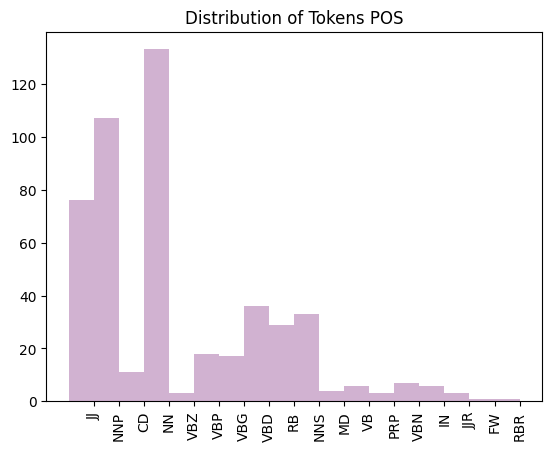

In [77]:
count = count_pos(result)

In [ ]:
from transformers import pipeline
import os
os.environ['TRANSFORMERS_CACHE'] = '/data2/hanyings/.cache'
unmasker = pipeline('fill-mask', model='bert-base-uncased')
import torch
from transformers import BertTokenizer, BertModel
from scipy.spatial.distance import cosine
# Load pre-trained model tokenizer (vocabulary)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

from nltk.corpus import wordnet as wn
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "zh"
def find_tokenidx(token, sentence_lst):
  for i in range(len(sentence_lst)):
    if token.lower() in sentence_lst[i].lower():
      return i
def token_vec_sum(text, word):
  marked_text = "[CLS] " + text + " [SEP]"
  tokenized_text = bert_tokenizer.tokenize(marked_text)
  index = find_tokenidx(word, tokenized_text)
  print(index)
  print(tokenized_text)
  indexed_tokens = bert_tokenizer.convert_tokens_to_ids(tokenized_text)
  segments_ids = [1] * len(tokenized_text)
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  model = BertModel.from_pretrained('bert-base-uncased',
                                    output_hidden_states = True, # Whether the model returns all hidden-states.
                                    )
  model.eval()
  with torch.no_grad():
      outputs = model(tokens_tensor, segments_tensors)
      hidden_states = outputs[2]
      token_embeddings = torch.stack(hidden_states, dim=0)
      token_embeddings = torch.squeeze(token_embeddings, dim=1)
      token_embeddings = token_embeddings.permute(1,0,2)
      token_vecs_sum = []
      for token in token_embeddings:
        sum_vec = torch.sum(token[-4:], dim=0)
        token_vecs_sum.append(sum_vec)
  return token_vecs_sum[index]
def similarity(origin, mutant, word, mutant_word):
  
  origin_sum, mutant_sum =  token_vec_sum(origin, word), token_vec_sum(mutant, mutant_word)
  return 1 - cosine(origin_sum, mutant_sum)
      
  
def mutant_pairs(examples):
  pairs=[]
  inputs = [ex["en"] for ex in examples]
  for i, input in enumerate(inputs):
    input_list = input.split()
    tokens = examples[i]['top_tokens']
    #print(tokens)
    token_idx = find_tokenidx(tokens[0], input_list)
    #print(input_list[token_idx])
    word = input_list[token_idx]

    input_list[token_idx] = "[MASK]"
    candidate = unmasker(" ".join(input_list))

    mutants = []
    for c in candidate[:3]:
      mutant = input_list.copy()
      mutant[token_idx] = c["token_str"]
      
      mutant_sent = " ".join(mutant)
      # if similarity(input, mutant_sent, word, c["token_str"]) >=0.9:
      mutants.append(" ".join(mutant))
    pairs.append({'en': input, 'mutants': mutants})
  return pairs

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
mutant_pairs(result)

[{'en': '28-Year-Old Chef Found Dead at San Francisco Mall',
  'mutants': ['28-Year-Old Chef Found work at San Francisco Mall',
   '28-Year-Old Chef Found himself at San Francisco Mall',
   '28-Year-Old Chef Found food at San Francisco Mall']},
 {'en': 'A 28-year-old chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.',
  'mutants': ['A young chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.',
   'A french chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.',
   'A local chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.']},
 {'en': 'But the victim\'s brother says he can\'t think of anyone who would want to hurt him, saying, "Things were finally going well for him."',
  'mutants': ['But the older brother says he can\'t think of anyone who would want to hurt him, saying, "Things 

In [ ]:

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('bert-base-nli-mean-tokens')
def sentence_sim(text1, text2):
    origin = model.encode(text1)
    mutant = model.encode(text2)
    return cosine_similarity(
    [origin],
    [mutant])[0][0]
